In [1]:
import pandas as pd
import pymysql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Importing Raw Data

In [ ]:
database = pymysql.connect("18.136.56.185",'dm_team2','dm_team1118#','')
cursor = database.cursor()
cursor.execute("show databases")
dbnames = cursor.fetchall()
dbnames
cursor.execute('use project_sales')
cursor.execute('show tables')
dat = cursor.fetchall()
dat
cursor.execute('select * from data')
data = cursor.fetchall()
df_backup = pd.DataFrame(list(data))
dt=df_backup
dt.to_excel(r'C:\Users\sairudra\Downloads\SalesEffeee.xlsx')
dt=df_backup

In [2]:
dt = pd.read_excel('SalesEffeee.xlsx')

## Source Code

### Exploratory Data Analysis

In [3]:
dt.shape

(7422, 9)

In [4]:
dt.columns = ['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']

In [5]:
dt.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
Created          7422 non-null object
Product_ID       7364 non-null float64
Source           7405 non-null object
Mobile           5612 non-null object
EMAIL            7422 non-null object
Sales_Agent      7399 non-null object
Location         7364 non-null object
Delivery_Mode    7422 non-null object
Status           7422 non-null object
dtypes: float64(1), object(8)
memory usage: 521.9+ KB


In [7]:
print(dt.isnull().sum())

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64


In [8]:
# Dropping the columns which are of no use in analysis
dt.drop(['Mobile'],axis=1,inplace=True)
dt.drop(['EMAIL'],axis=1,inplace=True)
dt.drop(['Created'],axis=1,inplace=True)

In [9]:
# Dropping rows with missing data because they are few
dt.replace('',np.nan,inplace=True)
dt.dropna(inplace=True)
dt.reset_index(inplace=True,drop=True)
dt.shape

(7328, 6)

In [10]:
dt.describe()

,Product_ID
count,7328.00000
mean,15.95101
std,6.07565
min,0.00000
25%,12.00000
50%,18.00000
75%,19.00000
max,28.00000


In [11]:
# Compressing and Merging the labes in column
dt.Source.replace(['Live Chat-Google Organic','Live Chat-Direct','Live Chat-Blog','Live Chat-PPC',
                   'Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-CPC',
                   'Live Chat-Quora','Live Chat-Youtube','Live Chat-Justdial'],'Live Chat',inplace=True)
dt.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
dt.Source.replace('By Recommendation','Customer Referral',inplace=True)
dt.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
dt.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [12]:
#
dt.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
dt.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [13]:
#
dt.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        'Less Sold Product',inplace=True) 

In [14]:
#Defining 'Status' as 'Good' or 'Bad'
dt.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
dt.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)

In [15]:
dt.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Good
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18.0,Website,Sales-Agent-11,Other Locations,Mode-1,Good
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,Good


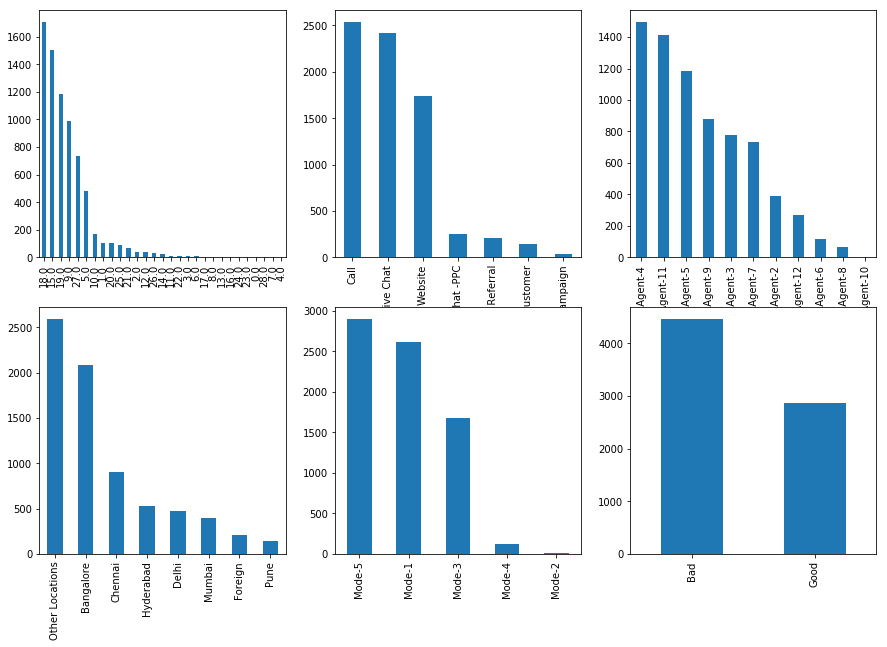

In [16]:
# Plotting the labels in each column
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
dt.Product_ID.value_counts().plot(kind='bar')
plt.subplot(2,3,2)
dt.Source.value_counts().plot(kind='bar')
plt.subplot(2,3,3)
dt.Sales_Agent.value_counts().plot(kind='bar')
plt.subplot(2,3,4)
dt.Location.value_counts().plot(kind='bar')
plt.subplot(2,3,5)
dt.Delivery_Mode.value_counts().plot(kind='bar')
plt.subplot(2,3,6)
dt.Status.value_counts().plot(kind='bar')

### Data Processing

In [17]:
# Label encoding all the columns
enc = LabelEncoder()
for i in (0,1,2,3,4,5):
    dt.iloc[:,i] = enc.fit_transform(dt.iloc[:,i])
dt.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,4,4,0,0,1
1,19,0,5,6,4,1
2,18,6,1,6,0,1
3,15,6,8,4,0,0
4,18,0,8,0,0,1


In [18]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
Product_ID       7328 non-null int64
Source           7328 non-null int32
Sales_Agent      7328 non-null int32
Location         7328 non-null int32
Delivery_Mode    7328 non-null int32
Status           7328 non-null int32
dtypes: int32(5), int64(1)
memory usage: 200.5 KB


In [19]:
# Checking the correlation coeffecient
dt.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.063450,0.006529,-0.041902,-0.036025,0.085415
Source,0.063450,1.000000,-0.029715,0.012592,-0.197923,-0.024830
Sales_Agent,0.006529,-0.029715,1.000000,-0.140876,-0.224688,0.137074
Location,-0.041902,0.012592,-0.140876,1.000000,0.414193,-0.347418
Delivery_Mode,-0.036025,-0.197923,-0.224688,0.414193,1.000000,-0.220445
Status,0.085415,-0.024830,0.137074,-0.347418,-0.220445,1.000000


In [20]:
y = dt.Status
X = dt.iloc[:,[0,1,2,3,4]]

In [21]:
# Splitting into training and testing data for accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [22]:
X_train.shape

(5129, 5)

In [23]:
X_test.shape

(2199, 5)

In [24]:
# SMOTE for sampling technique
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)

In [25]:
X_train.shape

(6294, 5)

In [26]:
X_test.shape

(2199, 5)

# Models

## 1. Logistic Regression

In [27]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression()
model_lg.fit(X_train,y_train)

C:\Users\sairudra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Predicting the model
y_predict_lg = model_lg.predict(X_test)

In [29]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_lg))
print(classification_report(y_test,y_predict_lg))
pd.crosstab(y_test, y_predict_lg)

0.658481127785357
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1319
           1       0.56      0.65      0.60       880

    accuracy                           0.66      2199
   macro avg       0.65      0.66      0.65      2199
weighted avg       0.67      0.66      0.66      2199



col_0,0,1
Status,,
0,877,442
1,309,571


In [30]:
print(confusion_matrix(y_test,y_predict_lg))

[[877 442]
 [309 571]]


## ROC AUC

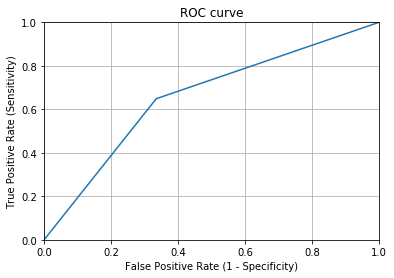

0.656880643049142


array([2, 1, 0])

In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_lg)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print(metrics.roc_auc_score(y_test,y_predict_lg))
thresholds

## 2. Naive Bayes

In [32]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [33]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [34]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

0.6361982719417917
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1319
           1       0.54      0.55      0.55       880

    accuracy                           0.64      2199
   macro avg       0.62      0.62      0.62      2199
weighted avg       0.64      0.64      0.64      2199



In [35]:
print(confusion_matrix(y_test,y_predict_nb))

[[913 406]
 [394 486]]


## 3. K-Nearest Neighbors

In [36]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [37]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [38]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.6734879490677581
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1319
           1       0.61      0.52      0.56       880

    accuracy                           0.67      2199
   macro avg       0.66      0.65      0.65      2199
weighted avg       0.67      0.67      0.67      2199



In [39]:
print(confusion_matrix(y_test,y_predict_knn))

[[1022  297]
 [ 421  459]]


## 4. Support Vector Machine

In [40]:
#Training the model
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf', C = 1, gamma = 1)
model_svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
# Predicting the model
y_predict_svm = model_svm.predict(X_test)

In [42]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.6866757617098681
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1319
           1       0.60      0.63      0.62       880

    accuracy                           0.69      2199
   macro avg       0.67      0.68      0.68      2199
weighted avg       0.69      0.69      0.69      2199



In [43]:
print(confusion_matrix(y_test,y_predict_svm))

[[959 360]
 [329 551]]


## 5. XGBoost Classifier

In [44]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=450,max_depth=17,gamma=5,learning_rate=0.01,random_state=10)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5,
              learning_rate=0.01, max_delta_step=0, max_depth=17,
              min_child_weight=1, missing=None, n_estimators=450, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [45]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test.values)

In [46]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.6971350613915416
              precision    recall  f1-score   support

           0       0.77      0.70      0.74      1319
           1       0.61      0.69      0.64       880

    accuracy                           0.70      2199
   macro avg       0.69      0.70      0.69      2199
weighted avg       0.71      0.70      0.70      2199



In [47]:
print(confusion_matrix(y_test,y_predict_xgb))

[[928 391]
 [275 605]]


## 6. Random Forest

In [48]:
# Training the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=23, n_jobs=None,
                                              oob_score=False, random_state=33,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'cr

In [49]:
model_gridrf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 2}

In [50]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [51]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.6889495225102319
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1319
           1       0.60      0.66      0.63       880

    accuracy                           0.69      2199
   macro avg       0.68      0.68      0.68      2199
weighted avg       0.70      0.69      0.69      2199



In [52]:
print(confusion_matrix(y_test,y_predict_rf))

[[934 385]
 [299 581]]


## 7. Decision Tree

In [53]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dt=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,4,6,10],'criterion':['gini']},{'min_samples_split':[2,4,6,10],'criterion':['entropy']}]

model_dtree=GridSearchCV(estimator=classifier_dt, param_grid=parameters, scoring='accuracy',cv=10)
model_dtree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 4, 6, 10]},
                         

In [54]:
model_dtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 10}

In [55]:
# Predicting the model
y_predict_dtree = model_dtree.predict(X_test)

In [56]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.681218735788995
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1319
           1       0.60      0.60      0.60       880

    accuracy                           0.68      2199
   macro avg       0.67      0.67      0.67      2199
weighted avg       0.68      0.68      0.68      2199



In [57]:
print(confusion_matrix(y_test,y_predict_dtree))

[[968 351]
 [350 530]]


## 8. Artificial Neural Network

In [58]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_ann = MLPClassifier(learning_rate_init= 0.1, hidden_layer_sizes= (90), random_state = 10)
model_ann.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=90, learning_rate='constant',
              learning_rate_init=0.1, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=10, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [59]:
# Predicting the model
y_predict_ann = model_ann.predict(X_test)

In [60]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_ann))
print(classification_report(y_test,y_predict_ann))

0.6748522055479763
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1319
           1       0.59      0.60      0.60       880

    accuracy                           0.67      2199
   macro avg       0.66      0.66      0.66      2199
weighted avg       0.68      0.67      0.68      2199



In [61]:
print(confusion_matrix(y_test,y_predict_ann))

[[956 363]
 [352 528]]


In [63]:
# Exporting the trained model
from sklearn.externals import joblib
joblib.dump(model_xgb,'FicZon_SalesEff.ml')

['FicZon_SalesEff.ml']